# Explore The data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

seed_ = 20200218

np.random.seed(seed_)
tf.random.set_seed(seed_)

import json

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", 
              context="paper", 
              font='Dank Mono', 
              font_scale=1.25, 
              rc={"figure.figsize": (10.5, 4.5), "figure.dpi": 150, "grid.alpha": 0.5}
             )
_30k = ["#202f66", "#ff7048", "#7f68d0", "#f3d36e", "#d869ab", "#1b262c"]
sns.set_palette(_30k)

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

import wordcloud

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import nltk

# Load Data

In [7]:
df = pd.read_json("./data/Sarcasm_Headlines_Dataset_v2.json", lines=True)

In [8]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [107]:
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

## class

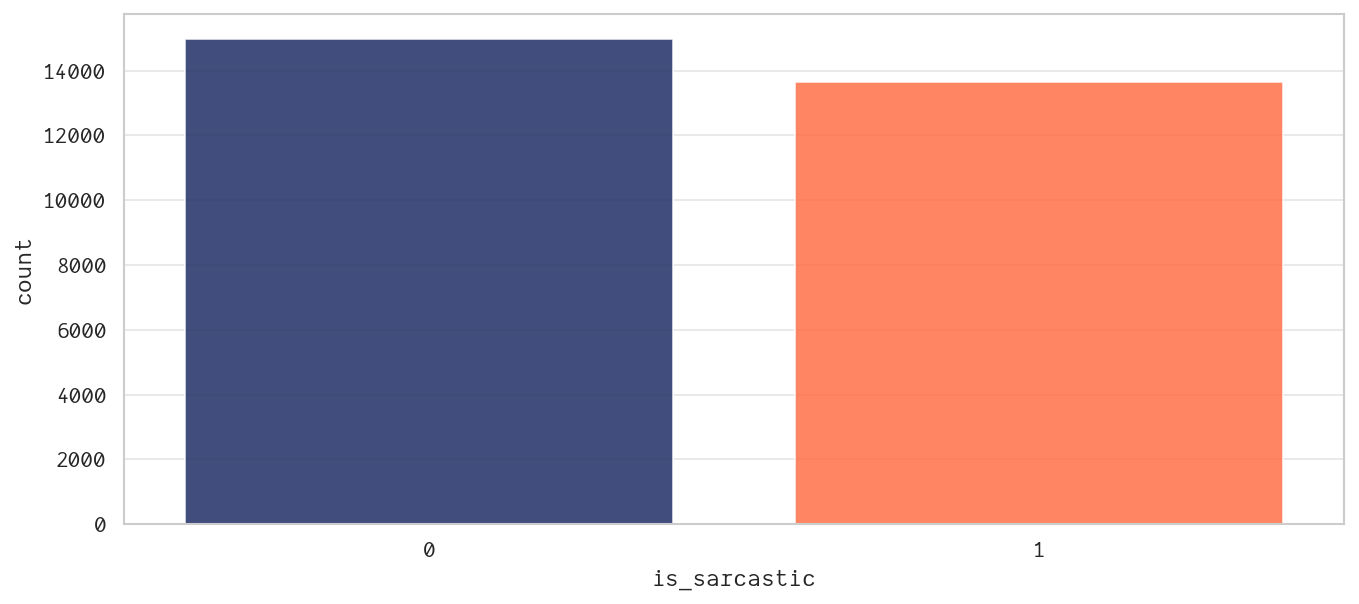

In [15]:
sns.countplot(df['is_sarcastic'], alpha=0.85, saturation=1)
plt.show()

> ### Dataset is balance

# Word Cloud

In [48]:
max_wordcloud_words = 1000

In [59]:
sarcastic_text = ' '.join(df[(df['is_sarcastic'] == 1)]['headline'])
wc = wordcloud.WordCloud(max_words=max_wordcloud_words, 
                         width=2100, height=900, 
                         background_color='white')
sarcastic_wc = wc.generate(sarcastic_text)

nonsarcastic_text = ' '.join(df[(df['is_sarcastic'] == 0)]['headline'])
wc = wordcloud.WordCloud(max_words=max_wordcloud_words, 
                         width=2100, height=900, 
                         background_color='white')
nonsarcastic_wc = wc.generate(nonsarcastic_text)

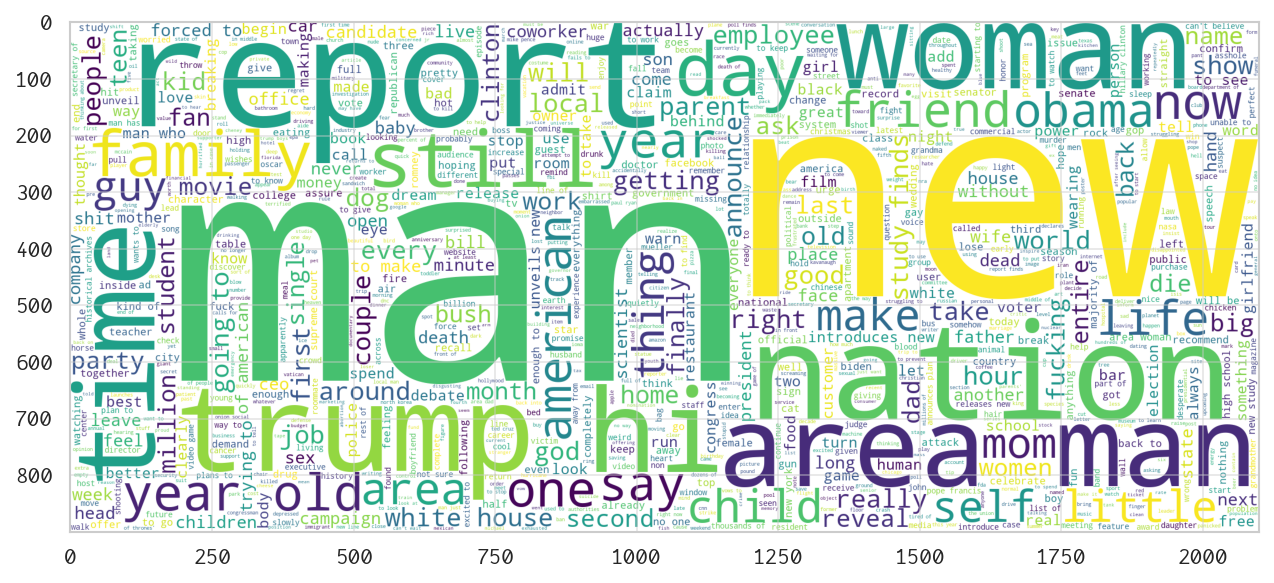

In [60]:
plt.imshow(sarcastic_wc)

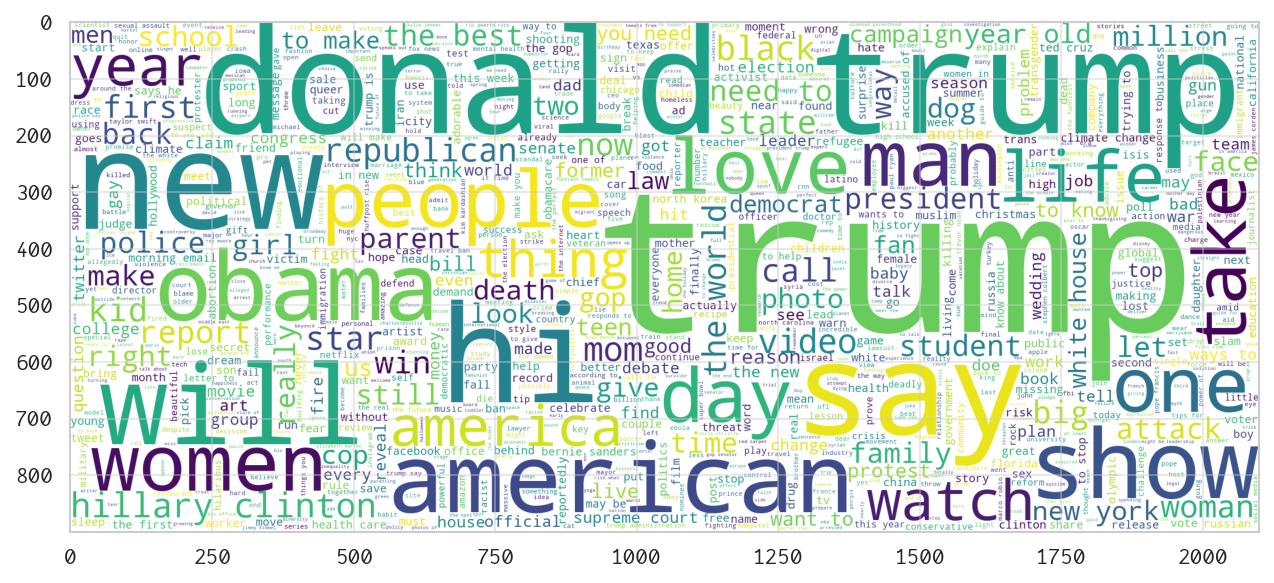

In [61]:
plt.imshow(nonsarcastic_wc)

# Number of Word in Sentence

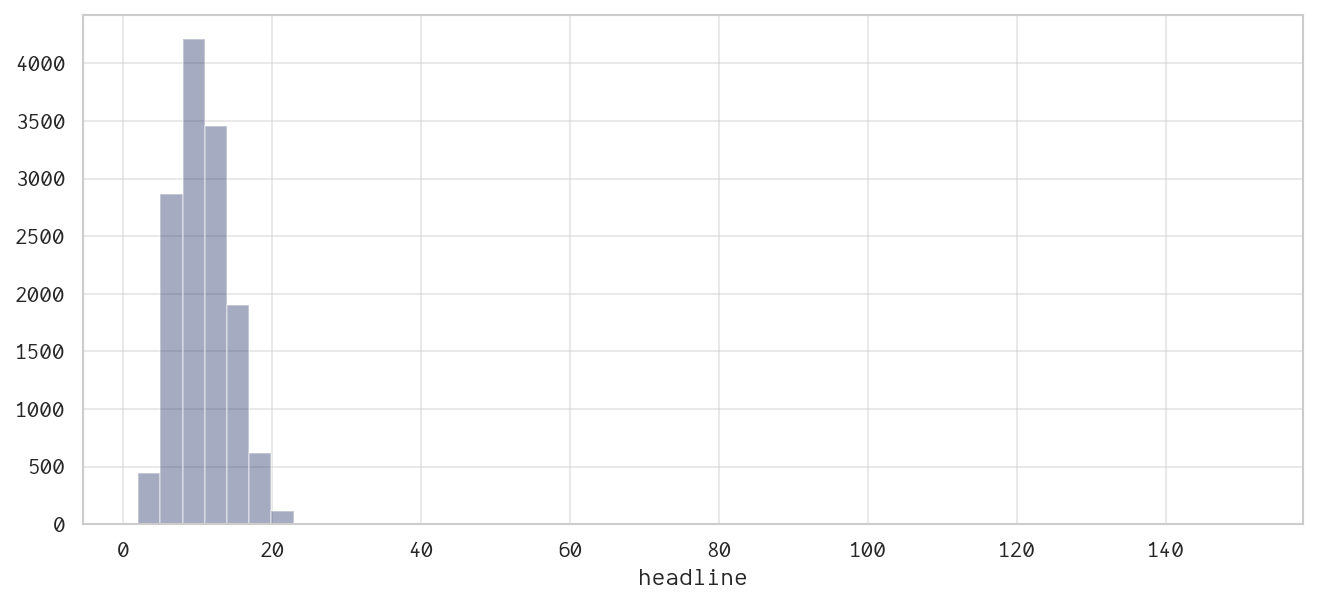

In [104]:
sns.distplot(
    df[(df['is_sarcastic'] == 1)]['headline'].apply(lambda x: len(x.split(' '))),
    kde=False
)

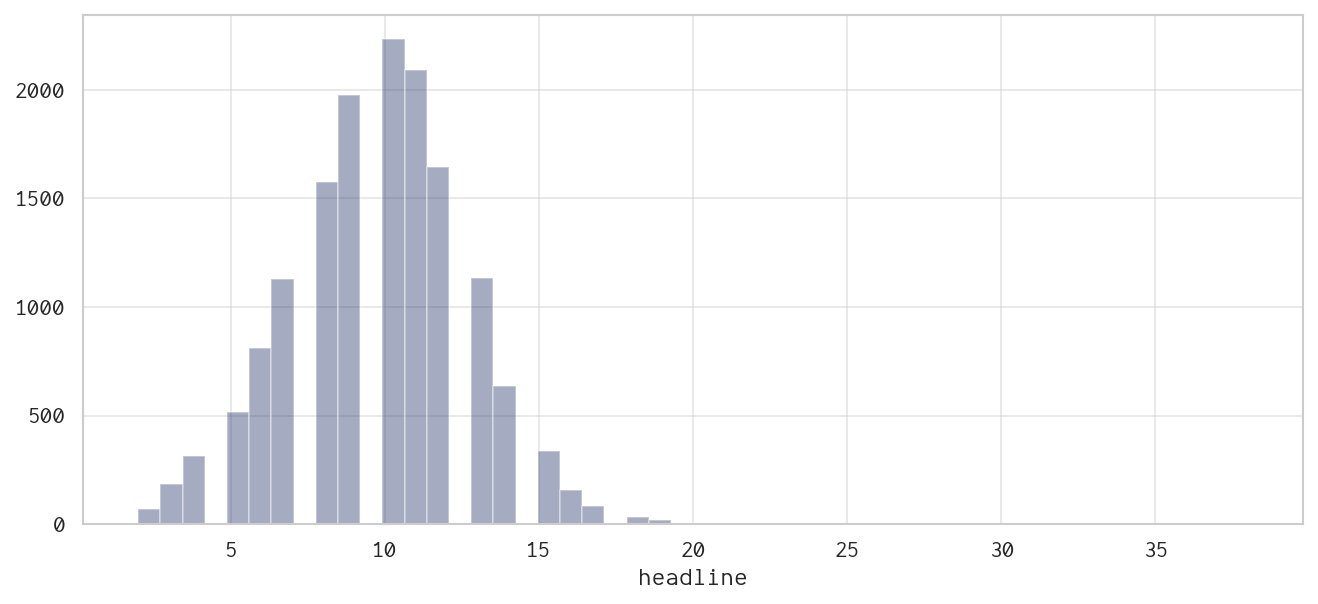

In [105]:
sns.distplot(
    df[(df['is_sarcastic'] == 0)]['headline'].apply(lambda x: len(x.split(' '))),
    kde=False
)